## Data Analysis Project: 
# **E-Commerese Website Logs**
### - Priyanshu Jha

In [33]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Load Dataset
data = pd.read_excel('E-commerce_Website_Logs.xlsx') 

In [35]:
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [36]:
data.shape

(172838, 15)

In [37]:
data.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

In [38]:
data.describe()

,accessed_date,duration_(secs),bytes,sales,returned_amount
count,172838,172838.000000,172838.000000,172838.000000,172838.000000
mean,2017-03-18 16:27:04.182139136,3248.031827,1535.206858,411.346449,74.012092
min,2017-03-14 17:43:26.135000,1500.000000,28.000000,0.000000,0.000000
25%,2017-03-16 21:31:35.724000,2371.000000,264.000000,5.230000,0.000000
50%,2017-03-18 18:05:46.921999872,3246.000000,589.000000,46.920000,0.000000
75%,2017-03-20 13:19:40.308999936,4124.000000,2430.000000,600.160000,0.000000
max,2017-03-21 23:59:30.671000,5000.000000,932858.000000,11199.968000,22638.480000
std,NaN,1010.872270,6349.555845,785.537868,364.446435


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   accessed_date     172838 non-null  datetime64[ns]
 1   duration_(secs)   172838 non-null  int64         
 2   network_protocol  172838 non-null  object        
 3   ip                172838 non-null  object        
 4   bytes             172838 non-null  int64         
 5   accessed_Ffom     172838 non-null  object        
 6   age               99457 non-null   object        
 7   gender            172838 non-null  object        
 8   country           172838 non-null  object        
 9   membership        172838 non-null  object        
 10  language          172838 non-null  object        
 11  sales             172838 non-null  float64       
 12  returned          172838 non-null  object        
 13  returned_amount   172838 non-null  float64       
 14  pay_

In [40]:
data = data.drop_duplicates()

In [41]:
data.isnull().sum()

accessed_date           0
duration_(secs)         0
network_protocol        0
ip                      0
bytes                   0
accessed_Ffom           0
age                 73381
gender                  0
country                 0
membership              0
language                0
sales                   0
returned                0
returned_amount         0
pay_method              0
dtype: int64

In [42]:
data['age'].unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       '--', 58, nan], dtype=object)

In [43]:
# Replace non-integer values ('--') with NaN
data['age'] = data['age'].replace('--', np.nan)

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_5924\2803639542.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace('--', np.nan)


In [44]:
# Fill missing values in the 'age' column with the mean age

meanAge = int(data['age'].mean())
data['age'].fillna(meanAge, inplace=True)

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_5924\3957322736.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(meanAge, inplace=True)


In [45]:
# Convert 'age' column to integer type
data['age'] = data['age'].astype(int)

In [46]:
data['network_protocol'].unique()

array(['TCP  ', 'ICMP ', 'HTTP', 'UDP  ', 'HTTP  '], dtype=object)

In [47]:
data['network_protocol'] = data['network_protocol'].str.strip()

In [48]:
data['pay_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash', 'Others'], dtype=object)

In [49]:
data['accessed_Ffom'].unique()

array(['Chrome', 'Mozilla Firefox', 'Android App', 'IOS App',
       'Microsoft Edge', 'Safari', 'Others', 'SafFRi'], dtype=object)

In [50]:
data['accessed_Ffom'] = data['accessed_Ffom'].replace('SafFRi', 'Safari')

In [51]:
# Convert categorical variables into numerical representations
label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['membership'] = label_encoder.fit_transform(data['membership'])
data['returned'] = label_encoder.fit_transform(data['returned'])

# data[''] = label_encoder.fit_transform(data[''])

In [52]:
# Get numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Get non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns

numeric_columns
non_numeric_columns

Index(['accessed_date', 'network_protocol', 'ip', 'accessed_Ffom', 'country',
       'language', 'pay_method'],
      dtype='object')

The correlation coefficient can take values between -1 and 1:

- 1: Indicates a perfect positive linear relationship. As one variable increases, the other variable also increases proportionally.
- 0: Indicates no linear relationship between the variables.
- -1: Indicates a perfect negative linear relationship. As one variable increases, the other variable decreases proportionally.

Text(0.5, 1.0, 'Correlation Heatmap')

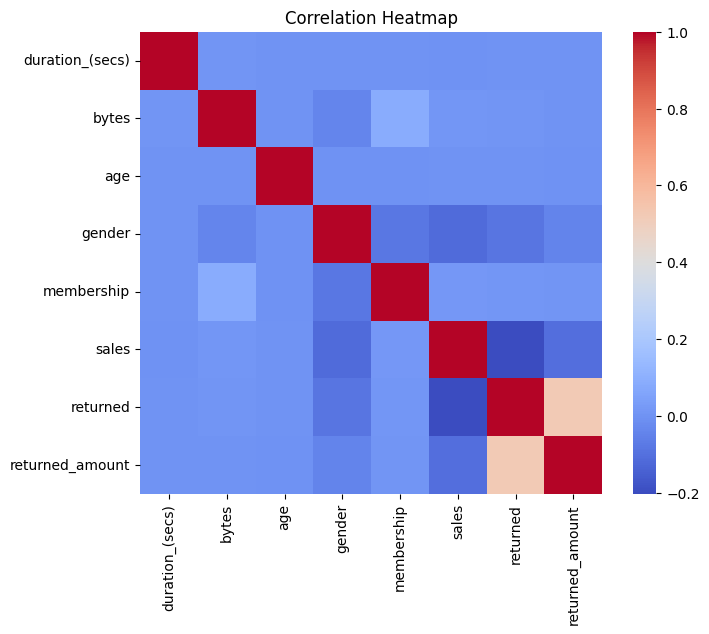

In [53]:
# Heatmap of Correlation_Matrix

correlation_data = data[numeric_columns].corr()

plt.figure(figsize=(8, 6))  # Adjust the width and height as needed
sns.heatmap(data=correlation_data, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

In [69]:
correlation_data

,duration_(secs),bytes,age,gender,membership,sales,returned,returned_amount
duration_(secs),1.000000,0.004571,0.000656,-0.000765,-0.000692,-0.001102,0.001605,0.000839
bytes,0.004571,1.000000,0.000972,-0.042848,0.084409,0.009330,0.004919,0.003387
age,0.000656,0.000972,1.000000,-0.005521,-0.001688,0.002155,-0.000211,-0.002150
gender,-0.000765,-0.042848,-0.005521,1.000000,-0.084077,-0.117705,-0.087058,-0.046758
membership,-0.000692,0.084409,-0.001688,-0.084077,1.000000,0.016145,0.010127,0.005182
sales,-0.001102,0.009330,0.002155,-0.117705,0.016145,1.000000,-0.202912,-0.106344
returned,0.001605,0.004919,-0.000211,-0.087058,0.010127,-0.202912,1.000000,0.524088
returned_amount,0.000839,0.003387,-0.002150,-0.046758,0.005182,-0.106344,0.524088,1.000000


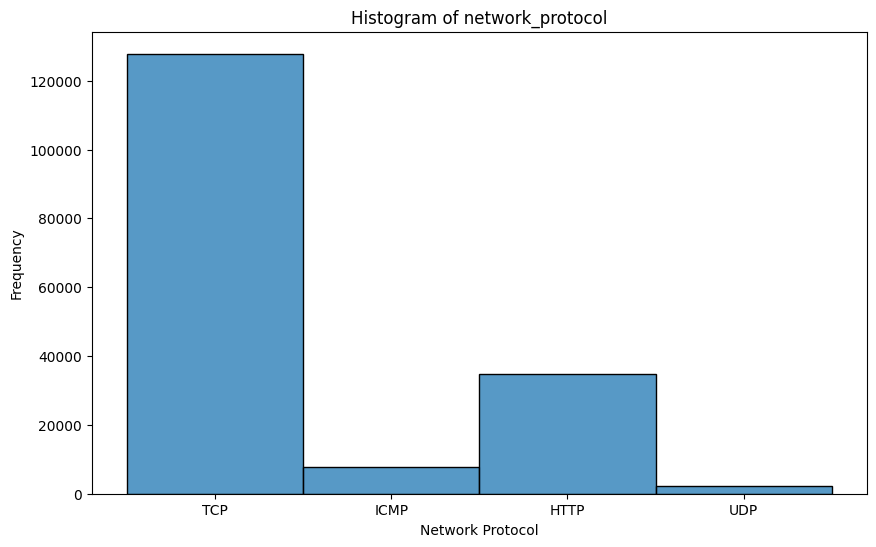

In [68]:
# Histogram for 'network_protocol'
plt.figure(figsize=(10, 6))
sns.histplot(x='network_protocol', data=data)
plt.title('Histogram of network_protocol')
plt.xlabel('Network Protocol')
plt.ylabel('Frequency')
plt.show()

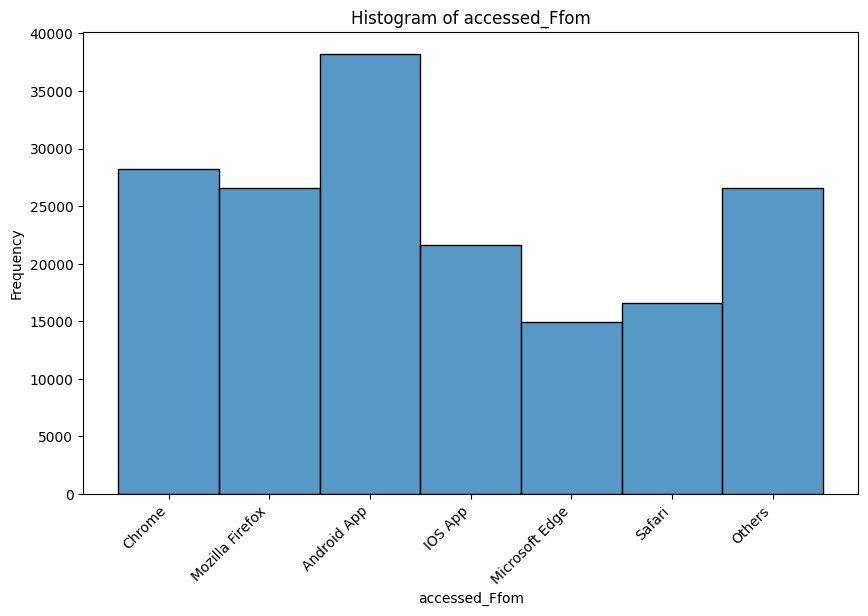

In [55]:
# Histogram for 'accessed_Ffom'
plt.figure(figsize=(10, 6))
sns.histplot(data['accessed_Ffom'])
plt.title('Histogram of accessed_Ffom')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('accessed_Ffom')
plt.ylabel('Frequency')
plt.show()

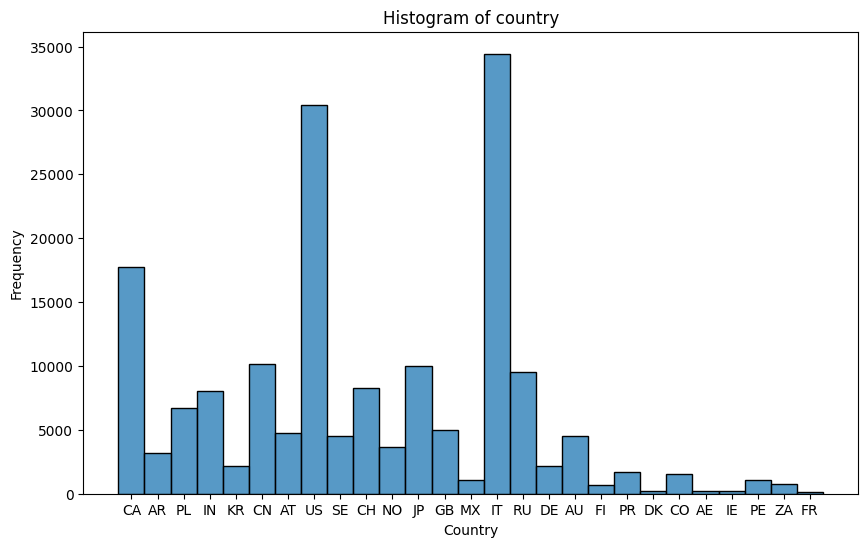

In [56]:
# Histogram for 'country'
plt.figure(figsize=(10, 6))
sns.histplot(data['country'])
plt.title('Histogram of country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

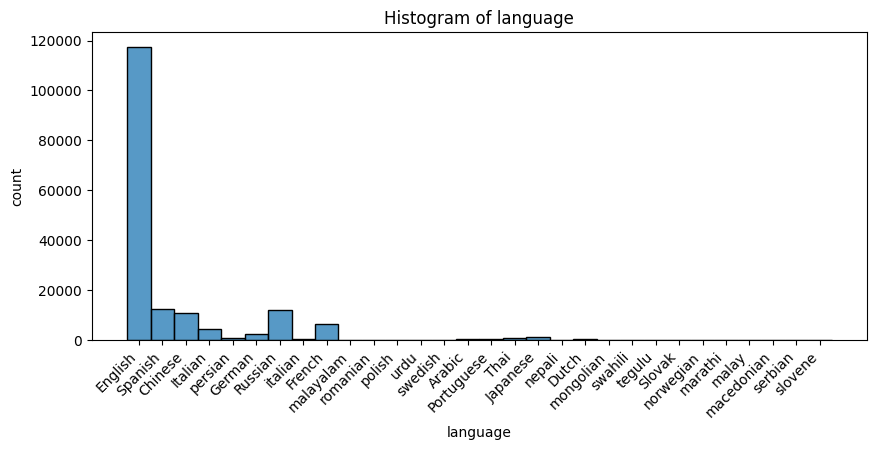

In [57]:
# Histogram for 'language'
plt.figure(figsize=(10, 4))
sns.histplot(data=data['language'])
plt.title('Histogram of language')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('language')
plt.ylabel('count')
plt.show()

In [58]:
data.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method'],
      dtype='object')

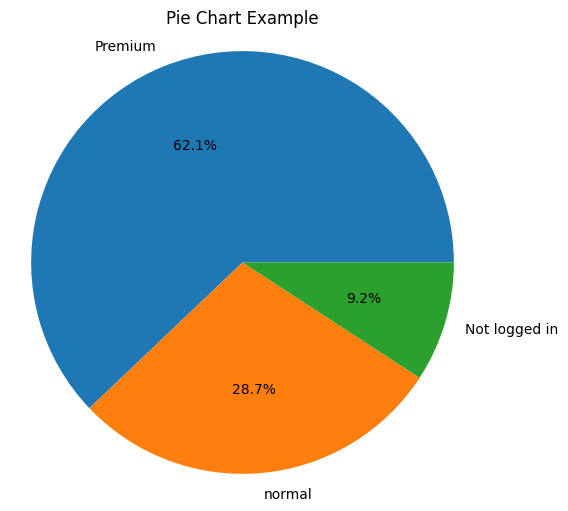

In [59]:
mem = data['membership'].value_counts()

# Pie chart for Membership
plt.figure(figsize=(6, 6))  # Set the size of the figure
plt.pie(mem, labels=['Premium', 'normal', 'Not logged in'], autopct='%1.1f%%')
plt.title('Pie Chart Example')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

<Axes: xlabel='pay_method', ylabel='sales'>

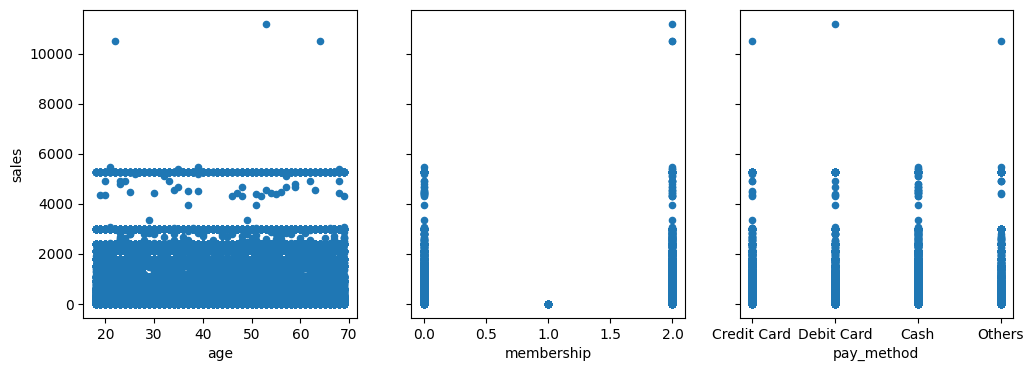

In [60]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
data.plot(kind="scatter", x='age', y='sales', ax=axs[0])
data.plot(kind="scatter", x='membership', y='sales', ax=axs[1])
data.plot(kind="scatter", x='pay_method',y='sales', ax=axs[2])

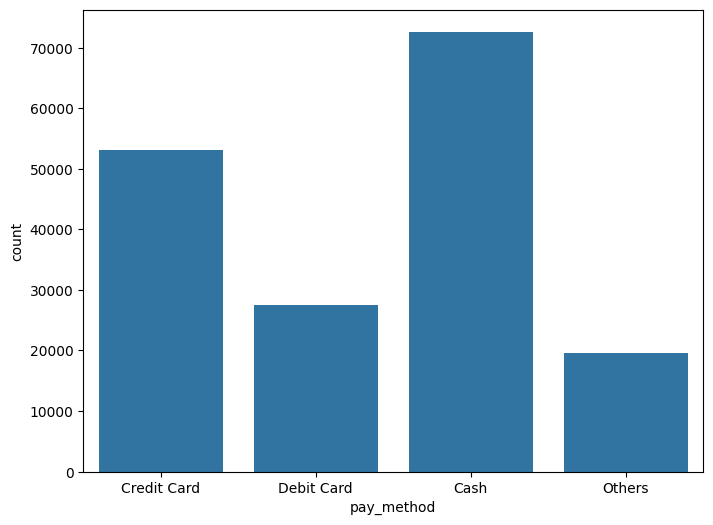

In [61]:
# Histogram for 'Pay_Method'
plt.figure(figsize=(8, 6))
sns.countplot(x='pay_method', data=data)
plt.show()

<Axes: xlabel='age', ylabel='sales'>

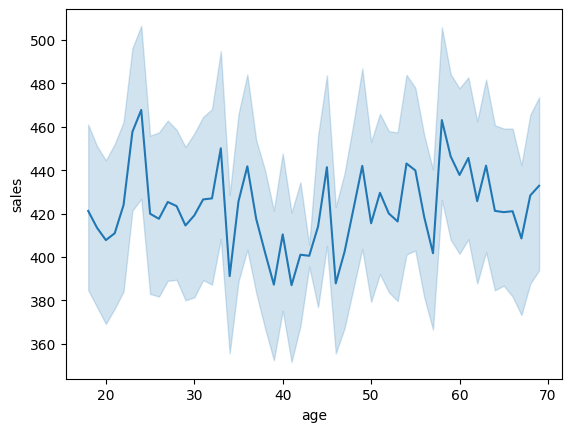

In [62]:
sns.lineplot(x='age', y='sales', data=data)

<Axes: xlabel='membership', ylabel='sales'>

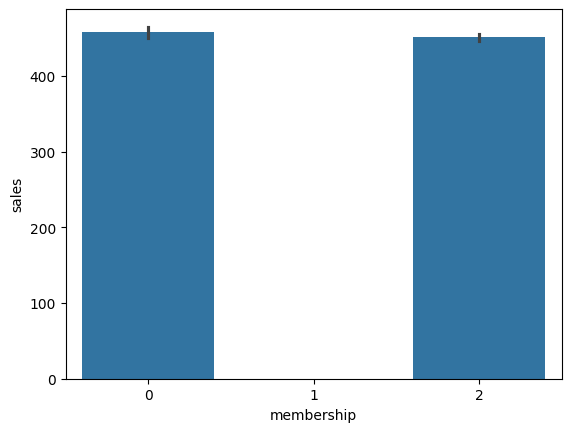

In [63]:
sns.barplot(x='membership', y='sales', data=data)

<Axes: xlabel='country', ylabel='returned'>

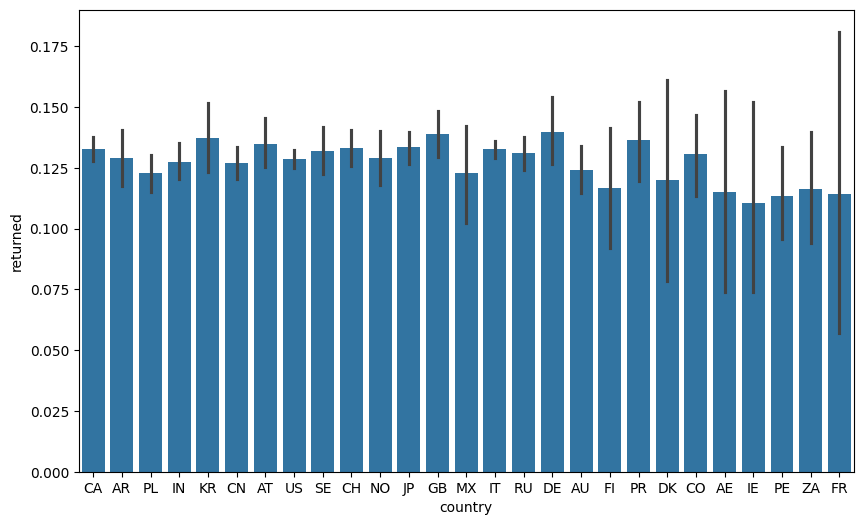

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(y='returned', x='country', data=data)
